<a href="https://colab.research.google.com/github/hlberghout/CHEM4420/blob/main/10_93_PiB_Average_Position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrate the PiB expression for the average position of the particle with n = 10 and explain the result.**

10.93 - Numerically integrate the expression for the average value of position for $\Psi_{10}$ for a particle-in-a-box and explain the answer.
---



This is a text block than can be used to explain sections of code in the program or even write a complete report.  Comments within the code block can also be used as demonstrated below.  The first code block of this notebook is a library declaration block defining the libraries the contain the functions that we will use and the notebook scrip that follows and how those functions are called.

In [ ]:
#note that any input following a pound symbol is a comment and is ignored by the intepreter.
#import math #Basic math library for Python
#import cmath #Complex math library for Python
import matplotlib #Matplotlib is a python plotting library used in this example.
import matplotlib.pyplot as plt #pyplot provides a matlab like plotting function.
import numpy as np #NumPy is the fundamental scientific computing package in Python.
#import pandas as pd #pandas data analysis library.
import scipy.constants as constants #SciPy physical constants library, SI units.
import scipy.integrate as integrate #SciPy Integration library
import scipy.optimize as optimize
import scipy.special as special #SciPy special functions library
import seaborn #matplotlib enhancement.
from IPython.display import Latex #library to allow creation of pretty formulas written in LATEX

This block defines the initial values of variable that are not defined elsewhere in the imported libraries above.

In [ ]:
# Defined variables
L = 1.0 #length of the box, also the right side limit of the box with the left side at x=0.0.
pts = 101 #number of points to plot between 0 and a, including a
x = np.linspace(0, L, pts) #x range variable between 0 and L
nmin = int(1) #minimum value of n
nmax = int(5) #maximum value of n

The average position of the particle in a one-dimensional box of length $L$ is given by the expection value of $x$:

$$ \langle x \rangle = \int_0^L \psi_n^* \hat x \psi_n \, \text d x ,$$


$$ \text{where} \; \psi_n (x)=\sqrt{\frac {2} {L}} \sin \left( \frac {n \pi x} {L} \right), \text{ where } n \text{ is a positive integer.} $$

In [ ]:
#Define the PIB wavefunction as a function
def psi_n(L, n, x):
    return np.sqrt(2/L)*np.sin(n*constants.pi*x/L)

This block of code produces the plot of the set up PIB wavefunctions requested so we can visually compare the functions.

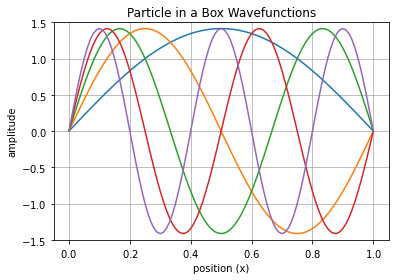

In [ ]:
#Plot PIB wave functions and squares.
fig = plt.figure()
ax = plt.axes()
n = nmin
while n <= nmax:
    ax.plot(x,psi_n(L, n, x))
    #ax.plot(x,psi_n(L, n, x), 'b')
    n += 1
ax.set(xlabel='position (x)', ylabel='amplitude',
       title="Particle in a Box Wavefunctions")
ax.grid()
plt.ylim(-1.5,1.5)
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()

According to the Born intepretation of the wavefunction, the probability of finding a particle in the range $a$ to $b$ is:
$$P = \int_a^b \Psi^* \Psi \text d \tau.$$
Applied the PIB particle, the resulting integral is:
$$ P_n (x) = \frac{2}{L}\int_a^b \sin^2\frac{n \pi x}{L} \text d x . $$
This block of code produces the plot of the probability distributions for the requested states so we can visually compare them.

In [ ]:
#Define the PIB wavefunction as a function
def prob_n(L,n,x):
    return psi_n(L,n,x)**2

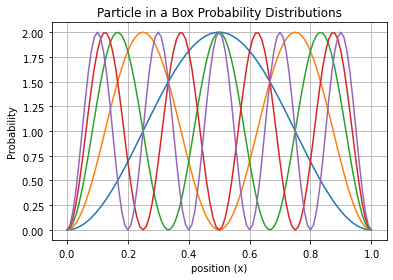

In [ ]:
#Plot PIB wave functions and squares.
fig = plt.figure()
ax = plt.axes()
n = nmin
while n <= nmax:
    ax.plot(x,prob_n(L, n, x))
    n += 1
ax.set(xlabel='position (x)', ylabel='Probability',
       title="Particle in a Box Probability Distributions")
ax.grid()
plt.ylim(-0.1,2.1)
plt.ticklabel_format(style='sci', axis='both',scilimits=(-3,4), useMathText='True')
plt.show()

A node in a wavefunction occurs anywhere the wavefunction changes sign, i.e., when the wavefunction crosses the zero axis.  The solutions of the PIB depend on $\sin \left( \frac {n \pi x} {L} \right)$.  Since the sine function is zero at integer factors of $\pi$, the wavefunction will be zero when $ m \pi = \frac {n \pi x} {L} $, where $ m $ is any integer such that and $m < n$.  Solving for $x$ yields $x= \frac {m L} {n}$.

|Quantum Number|Number of Nodes|Positions of nodes|
| :---: | :---: | :---: |
|1|0|NA|
|2|1|$ \frac {L} {2} $|
|3|2|$ \frac {L} {3}, \frac{2L}{3} $|
|4|3|$ \frac {L} {4}, \frac{2L}{4} = \frac{L}{2}, \frac{3L}{4} $|
|5|4|$ \frac {L} {5}, \frac{2L}{5}, \frac{3L}{5}, \frac{4L}{5} $|

In [ ]:
n = nmin
print("{0:^18} {1:^18} {2:^18}".format("Quantum Number", "Number of Nodes", "Node Position(s)"))
while n <= nmax:

    print('{0:^18} {1:^18}'.format(n, n-1), end ="")
    m = int(1)
    while m < n:
        if m > int(1): print(",", end="")
        print('{:6.3f}'.format(m/n*L), end ="")
        m += 1
    print()
    n += 1

  Quantum Number    Number of Nodes    Node Position(s) 
        1                  0         
        2                  1          0.500
        3                  2          0.333, 0.667
        4                  3          0.250, 0.500, 0.750
        5                  4          0.200, 0.400, 0.600, 0.800
